In [1]:
import pandas as pd
df= pd.read_pickle('../../data/Performance Leaders/univ_cumulative_returns.pkl')
df

,Cumulative Return | S&P 500 - Price Return,Cumulative Return | Schwab® S&P 500 Index,Cumulative Return | JPMorgan Large Cap Growth R6,Cumulative Return | DFA US Core Equity 2 I,Cumulative Return | DFA US Core Equity 1 I,Cumulative Return | DFA International Core Equity I,Cumulative Return | DFA Emerging Markets Core Equity I,Cumulative Return | DFA US Large Cap Value I,Cumulative Return | TIAA-CREF Equity Index W,Cumulative Return | JPMorgan Equity Income R6,...,Cumulative Return | Voya Large-Cap Growth I,Cumulative Return | MS China A Share,Cumulative Return | Empower Emerging Markets Equity Inst,Cumulative Return | MFS Blended Research Mid Cap Eq R6,Cumulative Return | T. Rowe Price Em Mkts Discv Stk I,Cumulative Return | Aegis Value I,Cumulative Return | Voya VACS Index MC,Cumulative Return | Calvert Small-Cap R6,Cumulative Return | Morgan Stanley Inst Discovery I,Cumulative Return | Calvert Emerging Markets Equity R6
Dates,,,,,,,,,,,,,,,,,,,,,
12/30/2022,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,,0.000000,0.000000,0.000000
01/02/2023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,,0.000000,0.000000,0.000000
01/03/2023,-0.400011,-0.391421,-0.682008,-0.405161,-0.436386,0.370084,0.446885,-0.361444,-0.405141,-0.221535,...,-0.773120,0.878735,0.890633,-7.143021e-01,0.328406,-2.564905,,0.066705,-1.645694,0.829639
01/04/2023,0.350802,0.357390,-0.277068,0.478823,0.469966,1.480382,2.284009,0.746988,0.441996,0.531689,...,-0.713648,2.519036,3.435133,7.143021e-01,2.627244,-1.282449,,1.267511,-0.968056,4.211858
01/05/2023,-0.817651,-0.799863,-1.364025,-0.405161,-0.402805,0.666179,2.333659,0.602408,-0.736638,-0.310154,...,-2.676190,3.807843,3.435133,-1.110223e-14,3.037803,-1.157334,,0.233482,-4.840271,4.084226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07/26/2023,18.941419,20.013619,25.490197,16.034686,16.930041,13.668993,12.907252,7.602011,19.631674,3.192585,...,28.070174,-4.569422,10.687015,1.348216e+01,11.083773,10.541135,5.1,12.374925,35.333979,8.359931
07/27/2023,18.17726,19.247787,25.298384,15.255422,16.185903,13.142053,12.555679,7.139054,18.747715,2.713511,...,27.505199,-5.038086,9.923665,1.258927e+01,10.755368,8.570537,3.9,10.640420,33.010646,7.402660
07/28/2023,19.344587,20.439070,27.536230,16.368653,17.268266,13.744309,14.363804,7.528914,19.999993,3.207320,...,29.556942,-2.519036,12.086548,1.321427e+01,12.643717,9.571474,4.7,11.040679,37.947722,9.380988


In [5]:
df.tail(1).stack().sort_values(ascending = False)

Dates                                                                   
08/01/2023  Cumulative Return | Baron Fifth Avenue Growth Instl              46.71028
            Cumulative Return | Shelton Nasdaq-100 Index Investor           44.056486
            Cumulative Return | Loomis Sayles Growth Y                      43.796068
            Cumulative Return | Baron Partners Institutional                43.634008
            Cumulative Return | Morgan Stanley Inst Growth I                42.057532
                                                                              ...    
            Cumulative Return | The Private Shares Fund I                   -3.314264
            Cumulative Return | Duff & Phelps Utility and Infra Fund Inc    -3.393919
            Cumulative Return | JH Tax-Advantaged Dividend Inc              -3.394457
            Cumulative Return | MS China A Share                             -3.51494
            Cumulative Return | JH Financial Opportunities         

C:\Users\nurciuoli\AppData\Local\Temp\1\ipykernel_26548\851626371.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Dates').mean().mean(axis=1).head(152).plot()


<Axes: xlabel='Dates'>

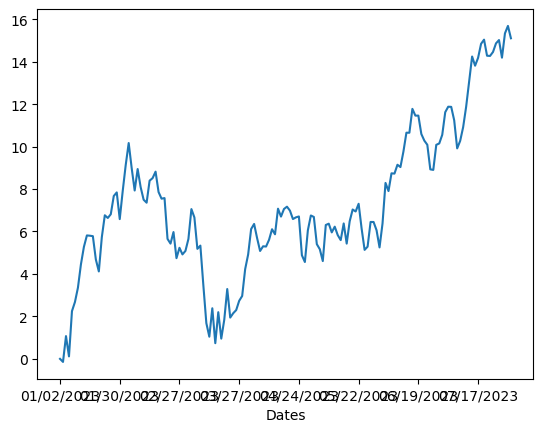

In [15]:
df.groupby('Dates').mean().mean(axis=1).head(152).plot()